# 05 Autoencoders

- Introduction to Autoencoders and Applications
- Autoencoder Structure
- Deep Belief Network

# Introduction to Autoencoders and Applications

<p align="center"> 
<img src="../images/01_Intro/04_models/14_autoencoder.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/01_Intro/04_models/15_autoencoder_apps.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/01_Intro/01_problem_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/01_Intro/02_problem_2.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/01_Intro/03_autoencoder.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/01_Intro/04_apps.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/01_Intro/05_curse_of_dimensionality.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/01_Intro/06_sparsity.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/01_Intro/07_autoencoder_vs_pca_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/01_Intro/08_autoencoder_vs_pca_2.png", width=800, height=600>
</p>

# Autoencoder Structure

<p align="center"> 
<img src="../images/05_Autoencoders/02_learning/01_autoencoder_1.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/02_learning/02_autoencoder_2.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/02_learning/03_autoencoder_3.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/02_learning/04_autoencoder_vs_rbm.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/02_learning/05_architecture.png", width=800, height=600>
</p>

<p align="center"> 
<img src="../images/05_Autoencoders/02_learning/06_learning_process.png", width=800, height=600>
</p>

<img src="https://ibm.box.com/shared/static/no7omt2jhqvv7uuls7ihnzikyl9ysnfp.png" style="width: 400px;">

An autoencoder can be divided in two parts, the <b>encoder</b> and the <b>decoder</b>.

The encoder needs to compress the representation of an input. In this case we are going to reduce the dimension the face of our actor, from 2000 dimensions to only 30 dimensions, by running the data through layers of our encoder.

The decoder works like encoder network in reverse. It works to recreate the input, as closely as possible. This plays an important role during training, because it forces the autoencoder to select the most important features in the compressed representation.

<a id="ref4"></a>
<h2>Performance</h2>

After the training has been done, you can use the encoded data as a reliable dimensionally-reduced data, applying it to any problems where dimensionality reduction seems appropriate.

<img src="https://ibm.box.com/shared/static/yt3xyon4g2jyw1w9qup1mvx7cgh28l64.png">

This image was extracted from the G. E. Hinton and R. R. Salakhutdinovcomparing's <a href="https://www.cs.toronto.edu/~hinton/science.pdf">paper</a>, on the two-dimensional reduction for 500 digits of the MNIST, with PCA on the left and autoencoder on the right. We can see that the autoencoder provided us with a better separation of data.

<a id="ref5"></a>
<h2>Training: Loss function</h2>

An autoencoder uses the Loss function to properly train the network. The Loss function will calculate the differences between our output and the expected results. After that, we can minimize this error with gradient descent. There are more than one type of Loss function, it depends on the type of data.

<h3>Binary Values:</h3>
$$l(f(x)) = - \sum_{k} (x_k log(\hat{x}_k) + (1 - x_k) \log (1 - \hat{x}_k) \ )$$

For binary values, we can use an equation based on the sum of Bernoulli's cross-entropy. 

$x_k$ is one of our inputs and $\hat{x}_k$ is the respective output.

We use this function so that if $x_k$ equals to one, we want to push $\hat{x}_k$ as close as possible to one. The same if $x_k$ equals to zero.

If the value is one, we just need to calculate the first part of the formula, that is, $- x_k log(\hat{x}_k)$. Which, turns out to just calculate $- log(\hat{x}_k)$.

And if the value is zero, we need to calculate just the second part, $(1 - x_k) \log (1 - \hat{x}_k) \ )$ - which turns out to be $log (1 - \hat{x}_k) $.



<h3>Real values:</h3>
$$l(f(x)) = - \frac{1}{2}\sum_{k} (\hat{x}_k- x_k \ )^2$$

As the above function would behave badly with inputs that are not 0 or 1, we can use the sum of squared differences for our Loss function. If you use this loss function, it's necessary that you use a linear activation function for the output layer.

As it was with the above example, $x_k$ is one of our inputs and $\hat{x}_k$ is the respective output, and we want to make our output as similar as possible to our input.

<h3>Loss Gradient:</h3>

$$\nabla_{\hat{a}(x^{(t)})} \ l( \ f(x^{(t)}))  = \hat{x}^{(t)} - x^{(t)} $$

We use the gradient descent to reach the local minimum of our function $l( \ f(x^{(t)})$, taking steps towards the negative of the gradient of the function in the current point.

Our function about the gradient $(\nabla_{\hat{a}(x^{(t)})})$ of the loss of $l( \ f(x^{(t)})$ in the preactivation of the output layer.

It's actually a simple formula, it is done by calculating the difference between our output $\hat{x}^{(t)}$ and our input $x^{(t)}$.

Then our network backpropagates our gradient $\nabla_{\hat{a}(x^{(t)})} \ l( \ f(x^{(t)}))$ through the network using <b>backpropagation</b>.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("../data/mnist/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Now, let's give the parameters that are going to be used by our NN.

In [3]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

Now we need to create our encoder. 
Sigmoidal functions delivers great results with this type of network. 
This is due to having a good derivative that is well-suited to backpropagation. 
Create our encoder using the sigmoidal function

In [4]:
# Building the encoder
def encoder(x):
    # Encoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    # Encoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

And the decoder:

You can see that the layer_1 in the encoder is the layer_2 in the decoder and vice-versa.

In [5]:
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),biases['decoder_b1']))
    # Decoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

Let's construct our model.
In the variable <code>cost</code> we have the loss function and in the <code>optimizer</code> variable we have our gradient used for backpropagation.

In [6]:
# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Reconstructed Images
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


For training we will run for 20 epochs.

In [7]:
# Launch the graph
# Using InteractiveSession (more convenient while using Notebooks)
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)
# Training cycle
for epoch in range(training_epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print(f"Epoch: {epoch+1} cost= {c:.9f}")

print("Optimization Finished!")

Epoch: 1 cost= 0.199206784
Epoch: 2 cost= 0.162534103
Epoch: 3 cost= 0.145250902
Epoch: 4 cost= 0.137110353
Epoch: 5 cost= 0.133230001
Epoch: 6 cost= 0.123301029
Epoch: 7 cost= 0.117733181
Epoch: 8 cost= 0.117027655
Epoch: 9 cost= 0.109509446
Epoch: 10 cost= 0.109413885
Epoch: 11 cost= 0.105632201
Epoch: 12 cost= 0.100575626
Epoch: 13 cost= 0.099308178
Epoch: 14 cost= 0.097329438
Epoch: 15 cost= 0.094611712
Epoch: 16 cost= 0.095629126
Epoch: 17 cost= 0.094360776
Epoch: 18 cost= 0.095305383
Epoch: 19 cost= 0.092547573
Epoch: 20 cost= 0.089663915
Optimization Finished!


Now, let's apply encoder and decoder for our tests.

In [8]:
# Applying encode and decode over test set
encode_decode = sess.run(
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

Let's simply visualize our graphs!

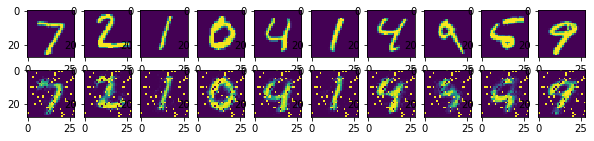

In [9]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))

As you can see, the reconstructions were successful. It can be seen that some noise were added to the image.

# Deep Belief Network

One problem with traditional multilayer perceptrons/artificial neural networks is that backpropagation can often lead to “local minima”. This is when your “error surface” contains multiple grooves and you fall into a groove that is not lowest possible groove as you perform gradient descent.

__Deep belief networks__ solve this problem by using an extra step called __pre-training__. Pre-training is done before backpropagation and can lead to an error rate not far from optimal. This puts us in the “neighborhood” of the final solution. Then we use backpropagation to slowly reduce the error rate from there.

DBNs can be divided in two major parts. The first one are multiple layers of Restricted Boltzmann Machines (RBMs) to pre-train our network. The second one is a feed-forward backpropagation network, that will further refine the results from the RBM stack.

<img src="https://ibm.box.com/shared/static/15y15xs7w72eer0on3gbi8zu6835imru.png" alt="DBN Model"/>

Let's begin by importing the necessary libraries and utilities functions to implement a Deep Belief Network.

In [10]:
#urllib is used to download the utils file from deeplearning.net

# import urllib.request
# with urllib.request.urlopen("http://deeplearning.net/tutorial/code/utils.py") as url:
#     response = url.read()
# target = open('../utils/utils.py', 'w')
# target.write(response.decode('utf-8'))
# target.close()

In [11]:
import os
import sys
sys.path.insert(0, os.path.abspath('../utils'))
sys.path.insert(1, os.path.abspath('../utils/utils'))

In [12]:
#Import the math function for calculations
import math
#Tensorflow library. Used to implement machine learning models
import tensorflow as tf
#Numpy contains helpful functions for efficient mathematical calculations
import numpy as np
#Image library for image manipulation
from PIL import Image

In [13]:
#import Image
#Utils file
import utils
from utils import tile_raster_images

## Constructing the Layers of RBMs

First of all, let's detail Restricted Boltzmann Machines.

#### What are Restricted Boltzmann Machines?
RBMs are shallow neural nets that learn to reconstruct data by themselves in an unsupervised fashion.

#### How it works?
Simply, RBM takes the inputs and translates them to a set of numbers that represents them. Then, these numbers can be translated back to reconstruct the inputs. Through several forward and backward passes, the RBM will be trained, and a trained RBM can reveal which features are the most important ones when detecting patterns.   

#### Why are RBMs important?
It can automatically extract __meaningful__ features from a given input.

#### What's the RBM's structure?
It only possesses two layers; A visible input layer, and a hidden layer where the features are learned.

<img src="https://ibm.box.com/shared/static/7th91vjz32jhslacdym7ll3udq2zixjb.png" alt="RBM Model" style="width: 400px;"/>

To implement DBNs in TensorFlow, we will implement a class for the Restricted Boltzmann Machines (RBM). The class below implements an intuitive way of creating and using RBM's.

In [14]:
#Class that defines the behavior of the RBM
class RBM(object):
    
    def __init__(self, input_size, output_size):
        #Defining the hyperparameters
        self._input_size = input_size #Size of input
        self._output_size = output_size #Size of output
        self.epochs = 5 #Amount of training iterations
        self.learning_rate = 1.0 #The step used in gradient descent
        self.batchsize = 100 #The size of how much data will be used for training per sub iteration
        
        #Initializing weights and biases as matrices full of zeroes
        self.w = np.zeros([input_size, output_size], np.float32) #Creates and initializes the weights with 0
        self.hb = np.zeros([output_size], np.float32) #Creates and initializes the hidden biases with 0
        self.vb = np.zeros([input_size], np.float32) #Creates and initializes the visible biases with 0


    #Fits the result from the weighted visible layer plus the bias into a sigmoid curve
    def prob_h_given_v(self, visible, w, hb):
        #Sigmoid 
        return tf.nn.sigmoid(tf.matmul(visible, w) + hb)

    #Fits the result from the weighted hidden layer plus the bias into a sigmoid curve
    def prob_v_given_h(self, hidden, w, vb):
        return tf.nn.sigmoid(tf.matmul(hidden, tf.transpose(w)) + vb)
    
    #Generate the sample probability
    def sample_prob(self, probs):
        return tf.nn.relu(tf.sign(probs - tf.random_uniform(tf.shape(probs))))

    #Training method for the model
    def train(self, X):
        #Create the placeholders for our parameters
        _w = tf.placeholder("float", [self._input_size, self._output_size])
        _hb = tf.placeholder("float", [self._output_size])
        _vb = tf.placeholder("float", [self._input_size])
        
        prv_w = np.zeros([self._input_size, self._output_size], np.float32) #Creates and initializes the weights with 0
        prv_hb = np.zeros([self._output_size], np.float32) #Creates and initializes the hidden biases with 0
        prv_vb = np.zeros([self._input_size], np.float32) #Creates and initializes the visible biases with 0

        
        cur_w = np.zeros([self._input_size, self._output_size], np.float32)
        cur_hb = np.zeros([self._output_size], np.float32)
        cur_vb = np.zeros([self._input_size], np.float32)
        v0 = tf.placeholder("float", [None, self._input_size])
        
        #Initialize with sample probabilities
        h0 = self.sample_prob(self.prob_h_given_v(v0, _w, _hb))
        v1 = self.sample_prob(self.prob_v_given_h(h0, _w, _vb))
        h1 = self.prob_h_given_v(v1, _w, _hb)
        
        #Create the Gradients
        positive_grad = tf.matmul(tf.transpose(v0), h0)
        negative_grad = tf.matmul(tf.transpose(v1), h1)
        
        #Update learning rates for the layers
        update_w = _w + self.learning_rate *(positive_grad - negative_grad) / tf.to_float(tf.shape(v0)[0])
        update_vb = _vb +  self.learning_rate * tf.reduce_mean(v0 - v1, 0)
        update_hb = _hb +  self.learning_rate * tf.reduce_mean(h0 - h1, 0)
        
        #Find the error rate
        err = tf.reduce_mean(tf.square(v0 - v1))
        
        #Training loop
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            #For each epoch
            for epoch in range(self.epochs):
                #For each step/batch
                for start, end in zip(range(0, len(X), self.batchsize),range(self.batchsize,len(X), self.batchsize)):
                    batch = X[start:end]
                    #Update the rates
                    cur_w = sess.run(update_w, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_hb = sess.run(update_hb, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    cur_vb = sess.run(update_vb, feed_dict={v0: batch, _w: prv_w, _hb: prv_hb, _vb: prv_vb})
                    prv_w = cur_w
                    prv_hb = cur_hb
                    prv_vb = cur_vb
                error = sess.run(err, feed_dict={v0: X, _w: cur_w, _vb: cur_vb, _hb: cur_hb})
                print (f'Epoch: {epoch} reconstruction error: {error}')                
            self.w = prv_w
            self.hb = prv_hb
            self.vb = prv_vb

    #Create expected output for our DBN
    def rbm_outpt(self, X):
        input_X = tf.constant(X)
        _w = tf.constant(self.w)
        _hb = tf.constant(self.hb)
        out = tf.nn.sigmoid(tf.matmul(input_X, _w) + _hb)
        with tf.Session() as sess:
            sess.run(tf.global_variables_initializer())
            return sess.run(out)

## The MNIST Dataset

We will be using the MNIST dataset, which is a commonly used dataset used for model benchmarking comprised of handwritten digits. We will import the images using "One Hot Encoding" to encode the handwritten images into values varying from 0 to 1.

<img src="https://ibm.box.com/shared/static/1yvz587r3jot1n8itvqqbcivv3ay40qh.png" alt="MNIST" style="width: 500px;"/>

In [15]:
#Getting the MNIST data provided by Tensorflow
from tensorflow.examples.tutorials.mnist import input_data

#Loading in the mnist data
mnist = input_data.read_data_sets("../data/mnist/", one_hot=True)
trX, trY, teX, teY = mnist.train.images, mnist.train.labels, mnist.test.images,\
    mnist.test.labels

Extracting ../data/mnist/train-images-idx3-ubyte.gz
Extracting ../data/mnist/train-labels-idx1-ubyte.gz
Extracting ../data/mnist/t10k-images-idx3-ubyte.gz
Extracting ../data/mnist/t10k-labels-idx1-ubyte.gz


## Creating the Deep Belief Network

With the RBM class created and MNIST Datasets loaded in, we can start creating the DBN. For our example, we are going to use a 3 RBMs, one with 500 hidden units, the second one with 200 and the last one with 50. We are generating a **deep hierarchical representation of the training data**. The cell below accomplishes this:

In [16]:
RBM_hidden_sizes = [500, 200 , 50 ] #create 2 layers of RBM with size 400 and 100

#Since we are training, set input as training data
inpX = trX

#Create list to hold our RBMs
rbm_list = []

#Size of inputs is the number of inputs in the training set
input_size = inpX.shape[1]

#For each RBM we want to generate
for i, size in enumerate(RBM_hidden_sizes):
    print ('RBM: ',i,' ',input_size,'->', size)
    rbm_list.append(RBM(input_size, size))
    input_size = size

RBM:  0   784 -> 500
RBM:  1   500 -> 200
RBM:  2   200 -> 50


## RBM Train

We will now begin the pre-training step and train each of the RBMs in our stack by individiually calling the train function, getting the current RBMs output and using it as the next RBM's input.

In [17]:
#For each RBM in our list
for rbm in rbm_list:
    print ('New RBM:')
    #Train a new one
    rbm.train(inpX) 
    #Return the output layer
    inpX = rbm.rbm_outpt(inpX)

New RBM:
Instructions for updating:
Use `tf.cast` instead.
Epoch: 0 reconstruction error: 0.059699781239032745
Epoch: 1 reconstruction error: 0.05231033265590668
Epoch: 2 reconstruction error: 0.04890792444348335
Epoch: 3 reconstruction error: 0.04741987958550453
Epoch: 4 reconstruction error: 0.045524962246418
New RBM:
Epoch: 0 reconstruction error: 0.03518270328640938
Epoch: 1 reconstruction error: 0.03080902248620987
Epoch: 2 reconstruction error: 0.02894127182662487
Epoch: 3 reconstruction error: 0.02752990461885929
Epoch: 4 reconstruction error: 0.026972386986017227
New RBM:
Epoch: 0 reconstruction error: 0.05804537609219551
Epoch: 1 reconstruction error: 0.054871778935194016
Epoch: 2 reconstruction error: 0.05316389724612236
Epoch: 3 reconstruction error: 0.0530136376619339
Epoch: 4 reconstruction error: 0.052518513053655624


Now we can convert the learned representation of input data into a supervised prediction, e.g. a linear classifier. Specifically, we use the output of the last hidden layer of the DBN to classify digits using a shallow Neural Network.

## Neural Network

The class below implements the Neural Network that makes use of the pre-trained RBMs from above.

In [18]:
import numpy as np
import math
import tensorflow as tf


class NN(object):
    
    def __init__(self, sizes, X, Y):
        #Initialize hyperparameters
        self._sizes = sizes
        self._X = X
        self._Y = Y
        self.w_list = []
        self.b_list = []
        self._learning_rate =  1.0
        self._momentum = 0.0
        self._epoches = 10
        self._batchsize = 100
        input_size = X.shape[1]
        
        #initialization loop
        for size in self._sizes + [Y.shape[1]]:
            #Define upper limit for the uniform distribution range
            max_range = 4 * math.sqrt(6. / (input_size + size))
            
            #Initialize weights through a random uniform distribution
            self.w_list.append(
                np.random.uniform( -max_range, max_range, [input_size, size]).astype(np.float32))
            
            #Initialize bias as zeroes
            self.b_list.append(np.zeros([size], np.float32))
            input_size = size
      
    #load data from rbm
    def load_from_rbms(self, dbn_sizes,rbm_list):
        #Check if expected sizes are correct
        assert len(dbn_sizes) == len(self._sizes)
        
        for i in range(len(self._sizes)):
            #Check if for each RBN the expected sizes are correct
            assert dbn_sizes[i] == self._sizes[i]
        
        #If everything is correct, bring over the weights and biases
        for i in range(len(self._sizes)):
            self.w_list[i] = rbm_list[i].w
            self.b_list[i] = rbm_list[i].hb

    #Training method
    def train(self):
        #Create placeholders for input, weights, biases, output
        _a = [None] * (len(self._sizes) + 2)
        _w = [None] * (len(self._sizes) + 1)
        _b = [None] * (len(self._sizes) + 1)
        _a[0] = tf.placeholder("float", [None, self._X.shape[1]])
        y = tf.placeholder("float", [None, self._Y.shape[1]])
        
        #Define variables and activation functoin
        for i in range(len(self._sizes) + 1):
            _w[i] = tf.Variable(self.w_list[i])
            _b[i] = tf.Variable(self.b_list[i])
        for i in range(1, len(self._sizes) + 2):
            _a[i] = tf.nn.sigmoid(tf.matmul(_a[i - 1], _w[i - 1]) + _b[i - 1])
        
        #Define the cost function
        cost = tf.reduce_mean(tf.square(_a[-1] - y))
        
        #Define the training operation (Momentum Optimizer minimizing the Cost function)
        train_op = tf.train.MomentumOptimizer(self._learning_rate, self._momentum).minimize(cost)
        
        #Prediction operation
        predict_op = tf.argmax(_a[-1], 1)
        
        #Training Loop
        with tf.Session() as sess:
            #Initialize Variables
            sess.run(tf.global_variables_initializer())
            
            #For each epoch
            for i in range(self._epoches):
                
                #For each step
                for start, end in zip(range(0, len(self._X), self._batchsize), range(self._batchsize, len(self._X), self._batchsize)):
                    
                    #Run the training operation on the input data
                    sess.run(train_op, feed_dict={ _a[0]: self._X[start:end], y: self._Y[start:end]})
                
                for j in range(len(self._sizes) + 1):
                    #Retrieve weights and biases
                    self.w_list[j] = sess.run(_w[j])
                    self.b_list[j] = sess.run(_b[j])
                
                print ("Accuracy rating for epoch " + str(i) + ": " + str(np.mean(np.argmax(self._Y, axis=1) == sess.run(predict_op, feed_dict={_a[0]: self._X, y: self._Y}))))

Now let's execute our code:

In [19]:
nNet = NN(RBM_hidden_sizes, trX, trY)
nNet.load_from_rbms(RBM_hidden_sizes,rbm_list)
nNet.train()

Accuracy rating for epoch 0: 0.5035454545454545
Accuracy rating for epoch 1: 0.6314727272727273
Accuracy rating for epoch 2: 0.7189090909090909
Accuracy rating for epoch 3: 0.8031636363636364
Accuracy rating for epoch 4: 0.8648181818181818
Accuracy rating for epoch 5: 0.8874909090909091
Accuracy rating for epoch 6: 0.8992727272727272
Accuracy rating for epoch 7: 0.9063818181818182
Accuracy rating for epoch 8: 0.9115272727272727
Accuracy rating for epoch 9: 0.9159454545454545
